In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objects as go


%matplotlib inline

In [70]:
donationData = pd.read_csv("donations_anonymized.csv", dtype={'zip':str})

donationData.drop(['target'], axis=1, inplace=True) #redundant column
print(donationData.anon_donor_id.unique().shape)
donationData = donationData.iloc[:2189] #get everything EXCEPT the last row which has a bad date
donationData = donationData[donationData['campaign'] != 'In-Kind']
donationData = donationData[donationData['campaign'] != 'In/Out']
#donationData = donationData[donationData['amount'] != donationData['amount'].max()] #note that this is a "Misc" campaign

donationData['date'] = pd.to_datetime(donationData['date'])


(1058,)


In [71]:
"""for columnName in donationData.columns:
    if columnName == "anon_donor_id":
        pass 
    else:
        print(columnName)
        print(donationData[columnName].unique())
        print("\n")
print(donationData['organisation'].unique())"""

'for columnName in donationData.columns:\n    if columnName == "anon_donor_id":\n        pass \n    else:\n        print(columnName)\n        print(donationData[columnName].unique())\n        print("\n")\nprint(donationData[\'organisation\'].unique())'

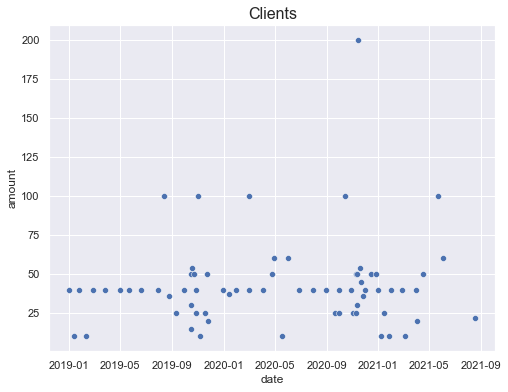

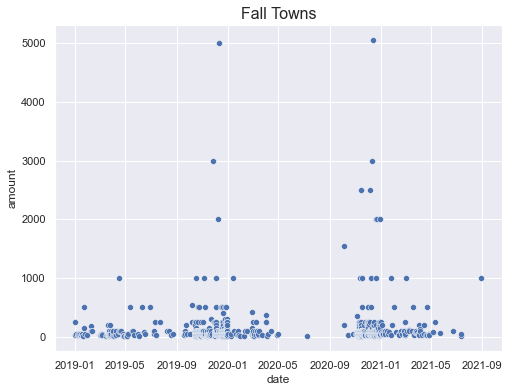

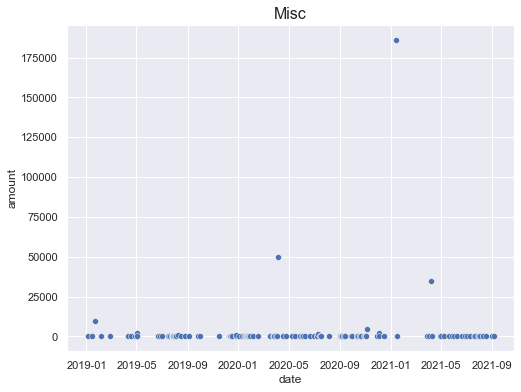

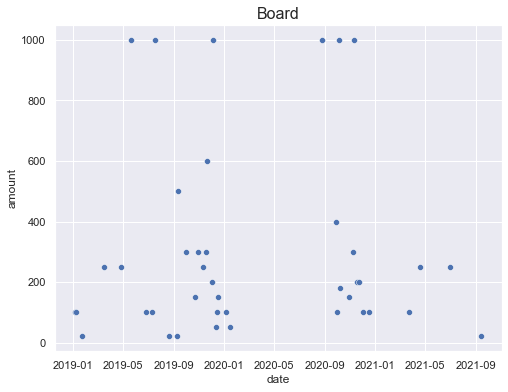

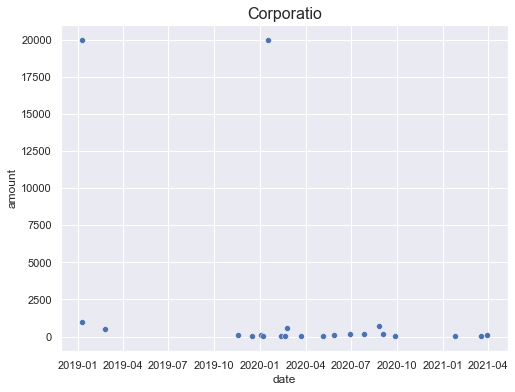

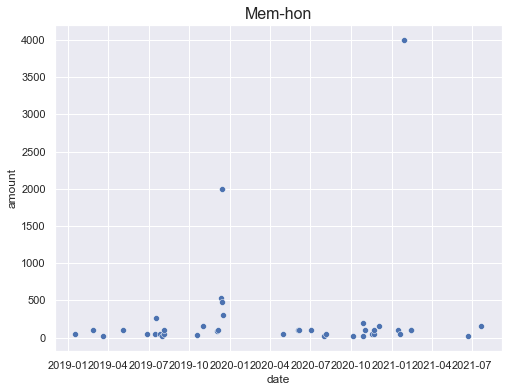

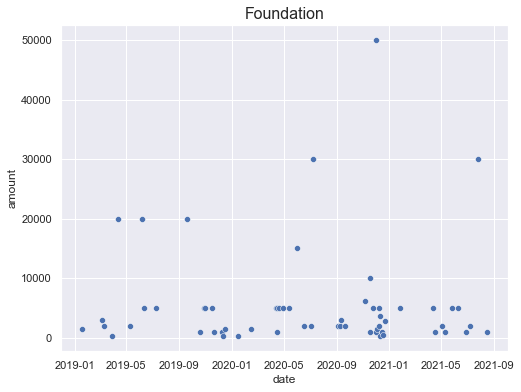

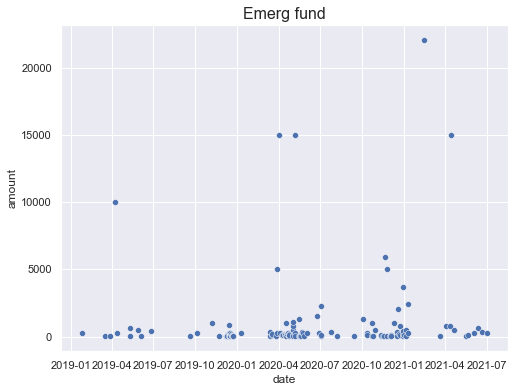

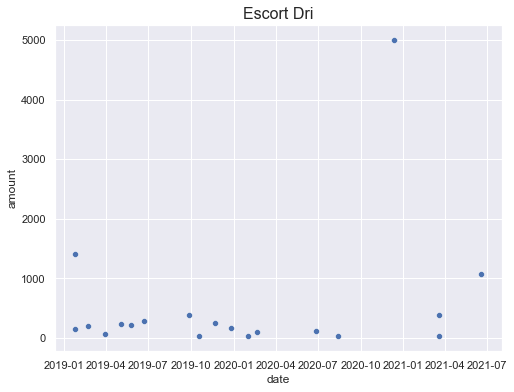

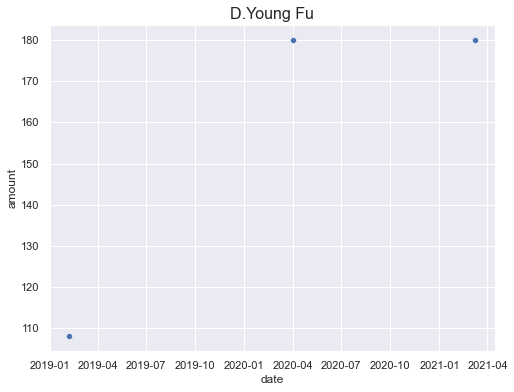

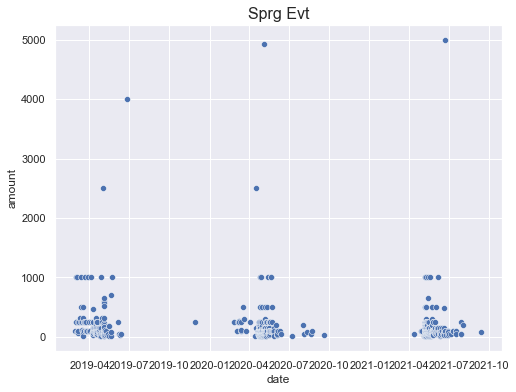

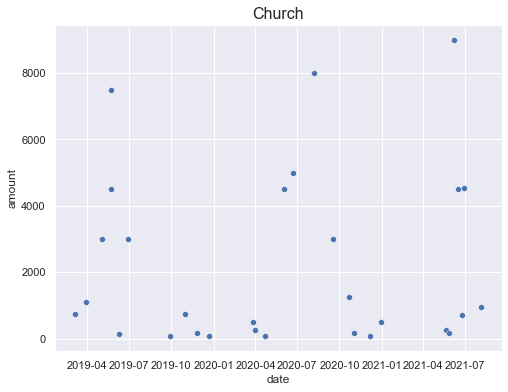

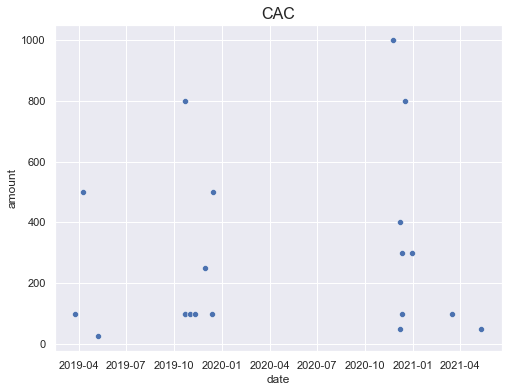

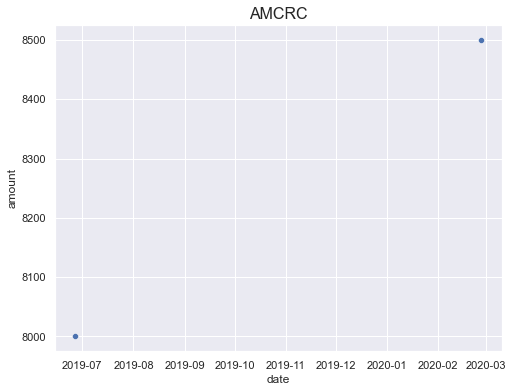

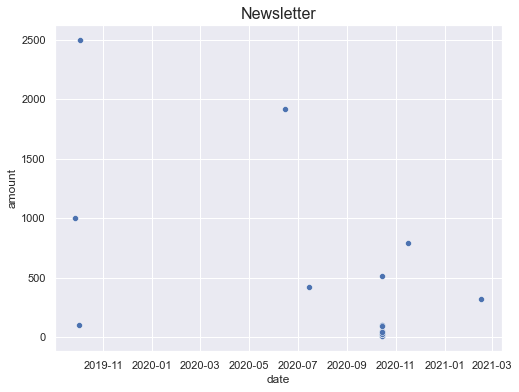

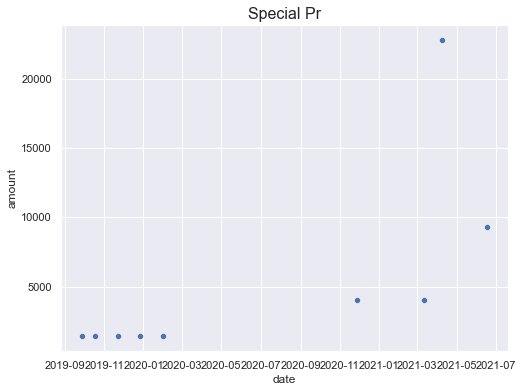

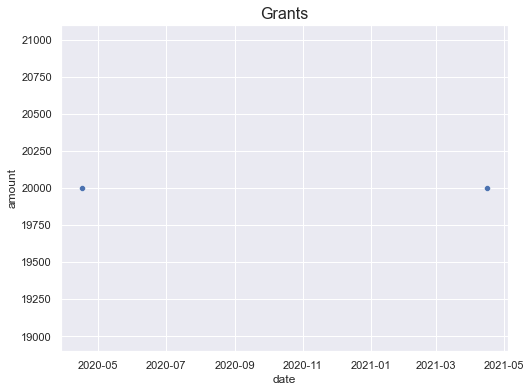

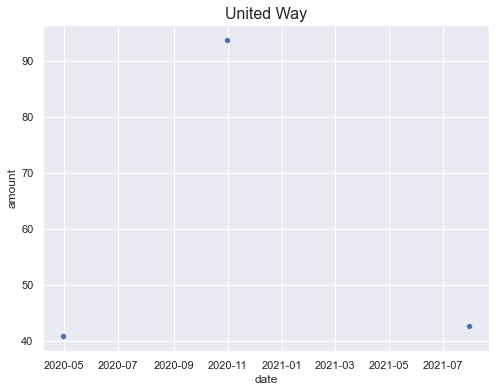

In [72]:
for campaignName in donationData['campaign'].unique():
    filteredByCampaignDF = donationData[donationData['campaign']== campaignName]
    sns.set(rc={'figure.figsize':(8,6)})
    ax = sns.scatterplot(data=filteredByCampaignDF, x="date", y="amount")
    ax.set_title(campaignName, fontsize=16)
    plt.show()

In [73]:
donationData['Quarter_FY'] = donationData['date'].dt.quarter
donationData['FY'] = donationData['date'].dt.year
donationData['month'] = donationData['date'].dt.month
groupByFYQuarter = donationData.groupby(['FY','Quarter_FY']).sum()['amount']
groupByFYMonth = donationData.groupby(['FY','month']).sum()['amount']

groupByFYQuarterCampaign = donationData.groupby(['campaign','FY','Quarter_FY']).sum()['amount']
groupByFYMonthCampaign = donationData.groupby(['campaign','FY','month']).sum()['amount']
print(groupByFYQuarterCampaign['AMCRC'])

FY    Quarter_FY
2019  2             8000.0
2020  1             8500.0
Name: amount, dtype: float64


In [47]:
# test groupByFYQuarterCampaign['AMCRC'].plot(kind='bar', stacked=True,figsize=(15, 8))

In [48]:
"""for campaignName in donationData['campaign'].unique():
    sns.set(rc={'figure.figsize':(8,6)})
    ax = groupByFYQuarterCampaign[campaignName].plot(kind='bar', stacked=True,figsize=(15, 8))
    ax.set_title(campaignName, fontsize=16)
    plt.show()
    ax = groupByFYMonthCampaign[campaignName].plot(kind='bar', stacked=True,figsize=(15, 8))
    ax.set_title(campaignName, fontsize=16)
    plt.show()"""

"for campaignName in donationData['campaign'].unique():\n    sns.set(rc={'figure.figsize':(8,6)})\n    ax = groupByFYQuarterCampaign[campaignName].plot(kind='bar', stacked=True,figsize=(15, 8))\n    ax.set_title(campaignName, fontsize=16)\n    plt.show()\n    ax = groupByFYMonthCampaign[campaignName].plot(kind='bar', stacked=True,figsize=(15, 8))\n    ax.set_title(campaignName, fontsize=16)\n    plt.show()"

In [74]:
highestClients = donationData.groupby(['anon_donor_id']).sum()['amount']

In [75]:
print(highestClients.sort_values(ascending = False)[:20])
print(highestClients.describe())

anon_donor_id
589    236092.00
135    138832.50
152    100000.00
396     62000.00
372     45250.00
83      40000.00
816     35000.00
920     31122.50
86      20000.00
752     20000.00
235     15000.00
903     15000.00
560     15000.00
482     15000.00
467     14964.67
719     13682.00
169     13000.00
15      12534.00
21      10483.78
34      10067.00
Name: amount, dtype: float64
count      1056.000000
mean       1204.596780
std        9582.644327
min           5.000000
25%          50.000000
50%         100.000000
75%         300.000000
max      236092.000000
Name: amount, dtype: float64


In [97]:
#boxplot of donations? 

####
#Overall bar graphs
groupByFYQuarter = donationData.groupby(['FY','Quarter_FY']).sum()['amount']

#creating projections for FYQuarter
groupByFYQuarterAvg = groupByFYQuarter.groupby(['Quarter_FY']).mean().to_list()
indexYear = [(2022, 1),(2022, 2),(2022, 3),(2022, 4)]
groupByFYQuarterAvg2022 = pd.Series(groupByFYQuarterAvg, index=indexYear) #convert to series to append

#groupByFYQuarterIncl2022 = groupByFYQuarter.append(groupByFYQuarterAvg2022)

#groupByFYQuarterIncl2022 = pd.DataFrame(groupByFYQuarterInclAvg, columns = ['Donation_Amount'])
#groupByFYQuarterIncl2022 = groupByFYQuarterInclAvg.reset_index()




groupByFYMonth = donationData.groupby(['FY','month']).sum()['amount']
groupByFYMonthDF = pd.DataFrame(groupByFYMonth)

#come up with predictions based on averages

#creating projections for FYMonth
groupByFYMonthAvg = groupByFYMonth.groupby(['month']).mean().to_list()
indexYear = [(2022, 1),(2022, 2),(2022, 3),(2022, 4),
             (2022, 5),(2022, 6),(2022, 7),(2022, 8),
             (2022, 9),(2022, 10),(2022, 11),(2022, 12)]
groupByFYMonthAvg2022 = pd.Series(groupByFYMonthAvg, index=indexYear)


In [105]:
groupByFYMonthAvg2022.unstack

(2022, 1)     87364.843333
(2022, 2)     12887.900000
(2022, 3)     13094.366667
(2022, 4)     91481.026667
(2022, 5)     42272.313333
(2022, 6)     35663.136667
(2022, 7)     26503.543333
(2022, 8)      5211.166667
(2022, 9)     12914.100000
(2022, 10)    19314.350000
(2022, 11)    69156.905000
(2022, 12)    56467.250000
dtype: float64

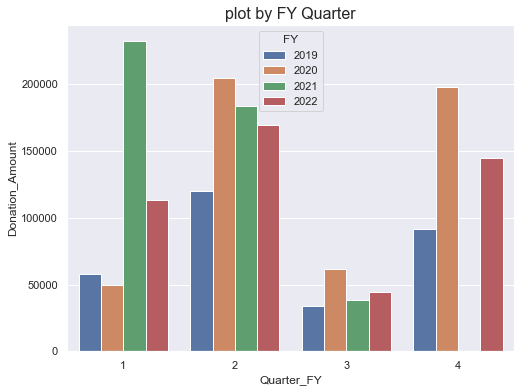

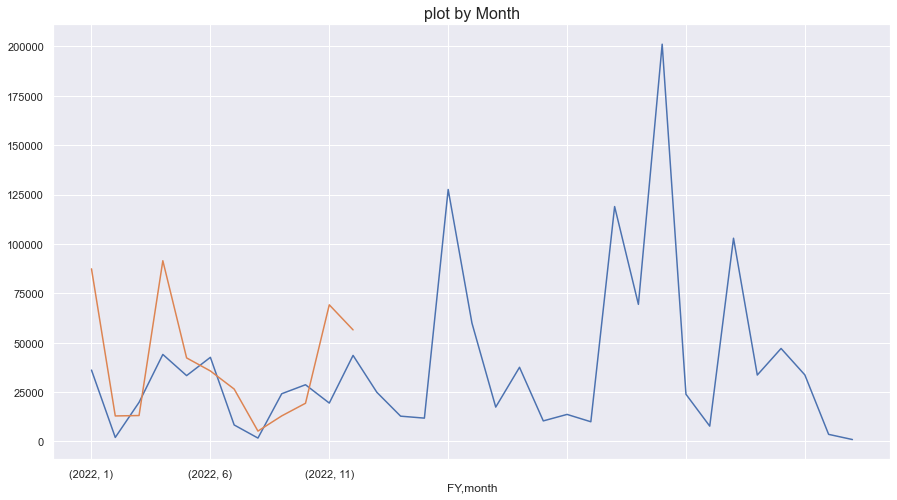

In [101]:
sns.set(rc={'figure.figsize':(8,6)})
#ax = groupByFYQuarter.plot(kind='bar', stacked=True,figsize=(15, 8))
ax = sns.barplot(x=groupByFYQuarterIncl2022['Quarter_FY'], y=groupByFYQuarterIncl2022['Donation_Amount'], 
                 hue = "FY", data=groupByFYQuarterIncl2022) #switch around and post both, maybe make chart bigger
ax.set_title("plot by FY Quarter", fontsize=16)
plt.show()


"""ax = sns.lineplot(x=groupByFYMonthDF.index, y=groupByFYMonthDF['amount'])
ax.set_title("Plot by Month", fontsize=16)
plt.show()"""

#WHY DOES IT NOT PLOT to the right?
ax = groupByFYMonth.plot(kind='line', figsize=(15, 8))
ax2 = groupByFYMonthAvg2022.plot(kind='line')
ax.set_title("plot by Month", fontsize=16)
plt.show()

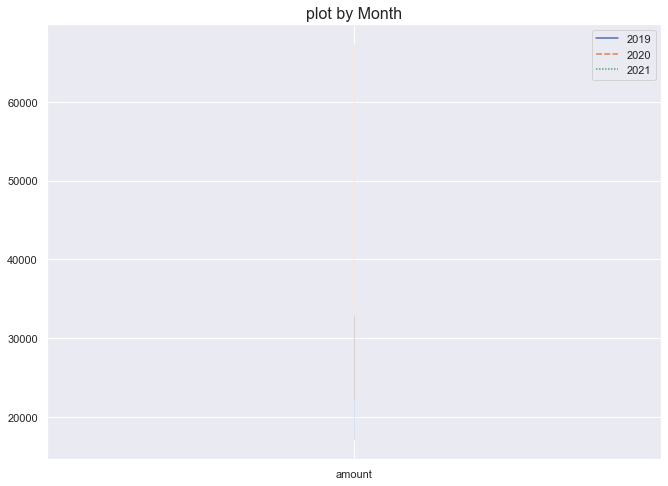

FY          2019                                                               \
month         1       2        3        4         5        6       7       8    
amount  36103.41  2006.8  19769.7  44027.0  33310.49  42566.7  8328.4  1687.9   

FY                        ...    2021                                        \
month        9        10  ...      3         4        5        6         7    
amount  24133.8  28684.9  ...  7730.4  102871.8  33602.5  47054.2  33665.23   

FY                                 
month       8      9   10  11  12  
amount  3564.0  945.0 NaN NaN NaN  

[1 rows x 36 columns]

In [112]:
groupByFYMonthDF = groupByFYMonthDF.unstack()
sns.set(rc={'figure.figsize':(11,8)})
ax = sns.lineplot(data= groupByFYMonthDF)
ax.set_title("plot by Month", fontsize=16)
plt.show()

groupByFYMonthDF.head()